### **Travail de :**
#  - Kpodjro KPATOUKPA
#  - Lyse Priscille NGASSEU NDIFO

In [ ]:
! pip install kagglehub

## Audio

**Q1 : Chargement du fichier audio**

In [ ]:
# Chargement des librairies
import librosa
import kagglehub
import os
import random
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [ ]:
# Download latest version
path = kagglehub.dataset_download("maulanaakbardwijaya/animal-sounds-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'animal-sounds-dataset' dataset.
Path to dataset files: /kaggle/input/animal-sounds-dataset


In [ ]:
!ls /root/.cache/kagglehub/datasets/maulanaakbardwijaya/animal-sounds-dataset/versions/1/DataTest

cat1.wav  cock1.wav	 dog-bark3.wav	goose1.wav  horseneigh2.wav
cat3.wav  dog2.wav	 duck1.wav	horse1.wav  lion1.wav
cat4.wav  dog_bark2.wav  duck3.wav	horse3.wav


In [ ]:
audio_dir = '/root/.cache/kagglehub/datasets/maulanaakbardwijaya/animal-sounds-dataset/versions/1/DataTest'
exts = (".mp3", ".wav",)
audios = [os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith(exts)]
assert audios, "Aucun fichier audio trouvé dans data/audio"
# Choisir un audio au hasard et l'afficher (lecteur intégré)
audio_path = random.choice(audios)
print("Selected : ", os.path.basename(audio_path))
#display(Video(vid_path, embed=True))

Selected :  cat3.wav


In [ ]:
y, sr = librosa.load(audio_path)

# Q2 : Affichage de la taille du signal et de sa durée


In [ ]:
print(f"Taille du signal : {len(y)}")
print(f"Durée : {len(y)/sr:.2f} secondes")
print(f"Fréquence d'échantillonnage : {sr}")

Taille du signal : 525312
Durée : 23.82 secondes
Fréquence d'échantillonnage : 22050


## Q3. Traçage du waveform


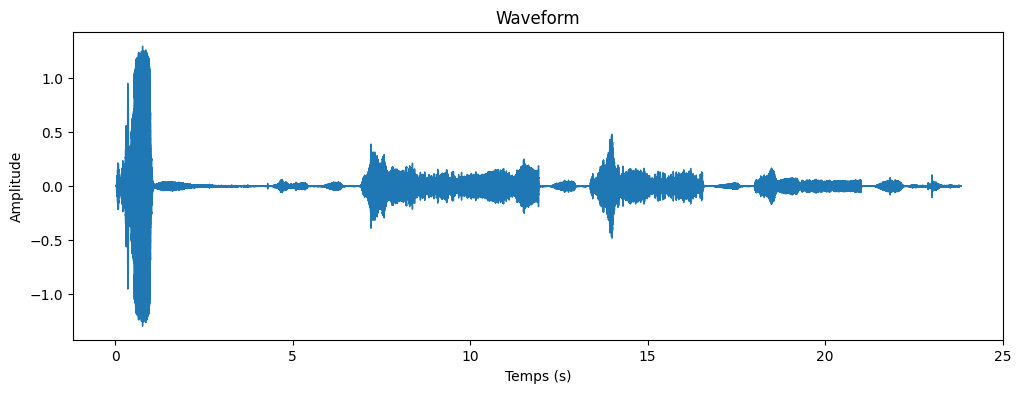

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.show()

## Q4. Calcul et affichage du spectrogramme


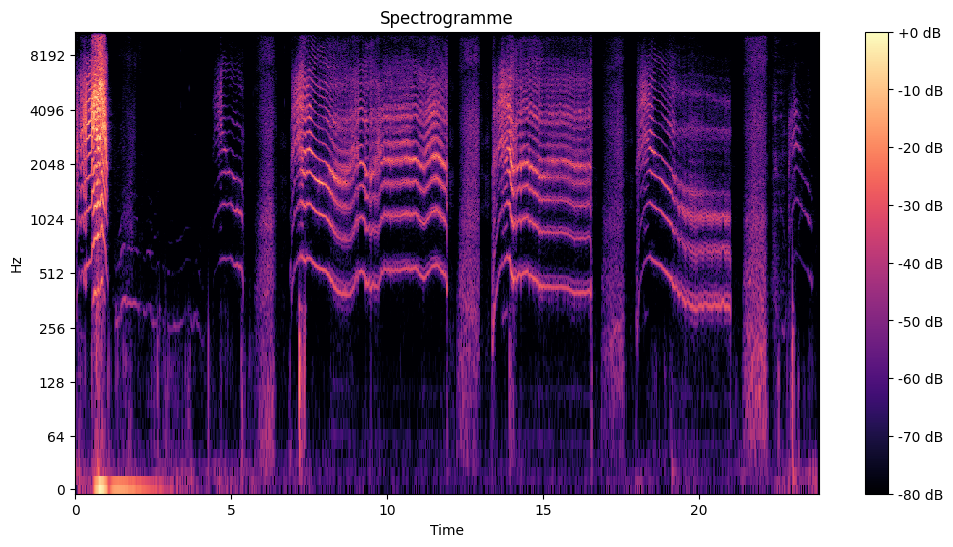

In [ ]:
D = librosa.stft(y)  # Transformée de Fourier
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogramme")
plt.show()

## Q5. Jouons le son dans Jupyter


In [ ]:

Audio(y, rate=sr)